In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
import tensorflow as tf

In [146]:
import cv2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

dataset downloaded from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [147]:
##dataset downloaded from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [148]:
fldr="./UTKFace1"

In [149]:
import os
files=os.listdir(fldr)

In [150]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace1/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace1/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace1/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace1/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace1/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace1/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace1/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace1/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace1/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace1/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace1/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace1/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace1/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace1/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace1/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace1/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace1/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace1/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace1/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace1/10_0_0_20161220222308131.jpg.chip.jpg
.

In [151]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

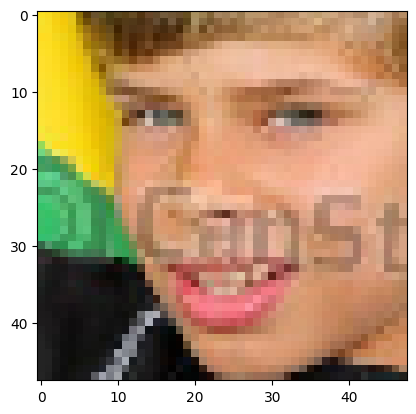

In [152]:
plt.imshow(images[45])

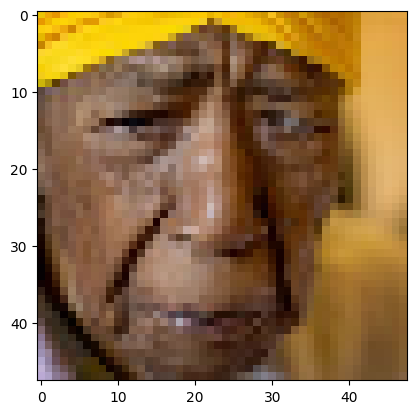

In [153]:
plt.imshow(images[18])

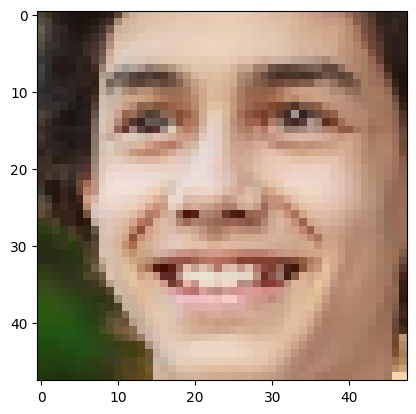

In [154]:
plt.imshow(images[100])

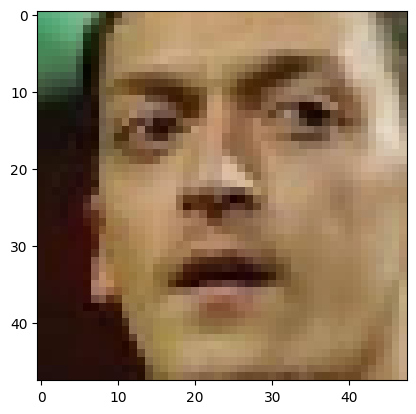

In [155]:
plt.imshow(images[5089])

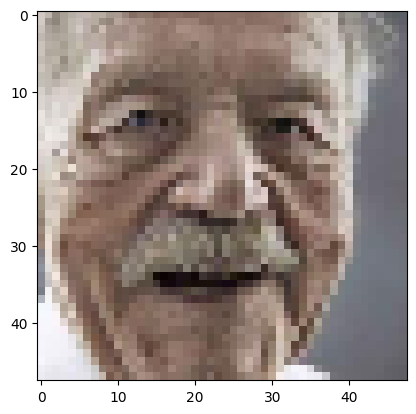

In [156]:
plt.imshow(images[0])

In [157]:
print(genders[0])

0


In [158]:
print(genders[8999])

0


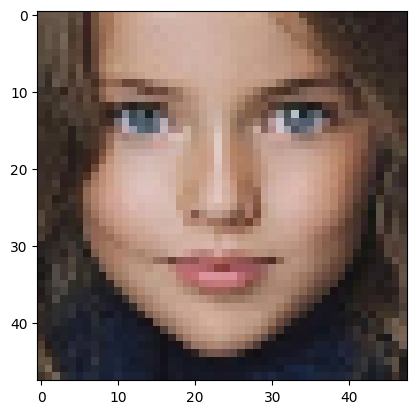

In [159]:
plt.imshow(images[120])

In [160]:
print(genders[120])

1


In [161]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [162]:
np.save(fldr + '/images.npy', images_f)
np.save(fldr + '/ages.npy', ages_f)
np.save(fldr + '/genders.npy', genders_f)

In [163]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


In [164]:
print(values)

[0 1]


In [165]:
print(values,counts)

[0 1] [12391 11317]


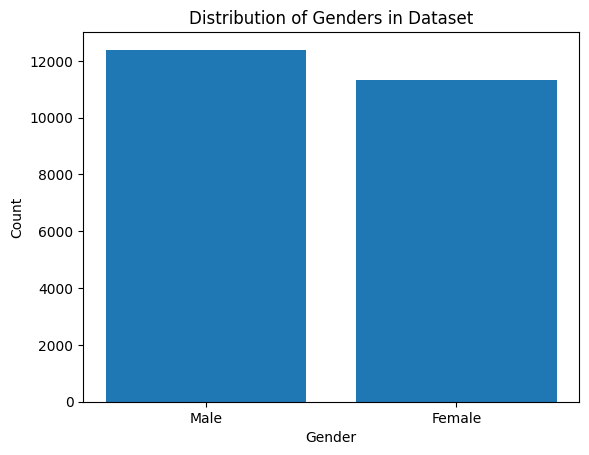

In [166]:
gender = ["Male", "Female"]
values = [12391, 11317]

plt.bar(gender, values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Genders in Dataset")
plt.show()

In [167]:
values_age,counts_age=np.unique(ages_f,return_counts=True)
print(counts_age)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [168]:
print(values_age)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [169]:
print(values_age,counts_age)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116] [1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [170]:
val=values_age.tolist()
cnt=counts_age.tolist()

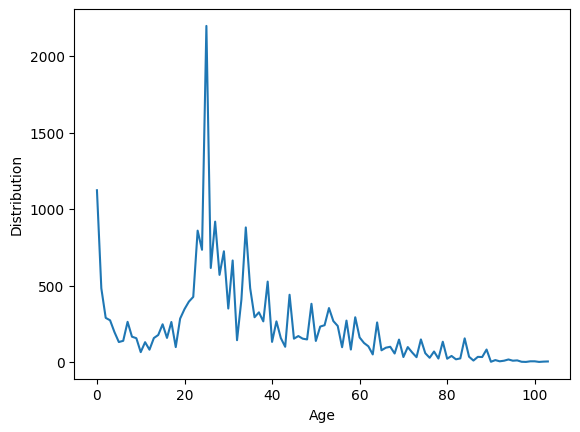

In [171]:
plt.plot(counts_age)
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.show()

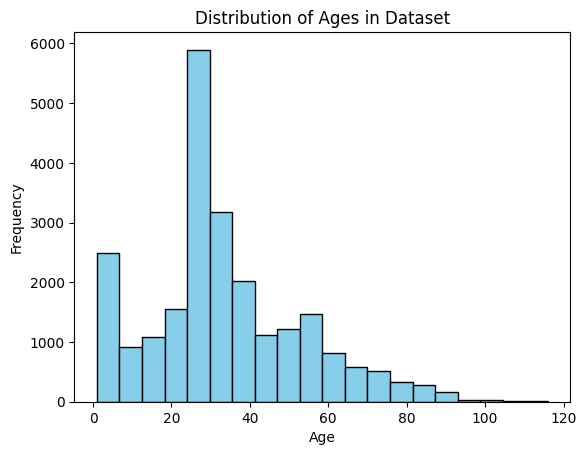

In [172]:
plt.hist(ages_f, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages in Dataset")
plt.show()

In [173]:
len(genders)

23708

In [174]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## creating another list of images from existing one
### for better learning

In [175]:
images_f_2=images_f/255
#images_f_2

In [176]:
images_f_2.shape

(23708, 48, 48, 3)

In [177]:
labels_f=np.array(labels)

## spliting the data set

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train, x_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [180]:
y_train[0:5]

array([[66,  0],
       [50,  0],
       [27,  1],
       [54,  0],
       [20,  0]])

### spliting y_test and y_train further
#### for better understanding

In [181]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [182]:
y_train_2[0][0:5]

array([0, 0, 1, 0, 0])

In [183]:
y_train_2[1][0:5]

array([66, 50, 27, 54, 20])

### Defining the model

In [184]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [185]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

In [186]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [187]:
Model=model((48,48,3))
Model

<Functional name=functional_7, built=True>

In [188]:
Model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 48, 48, 3)         │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_16 (Conv2D)            │ (None, 48, 48, 32)        │         896 │ input_layer_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ dropout_24 (Dropout)          │ (None, 48, 48, 32)        │           0 │ conv2d_16[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_16 (Activation)    │ (None, 48, 48, 32)        │           0 │ dropout_24[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ max_pooling2d_16              │ (None, 24, 24, 32)        │           0 │ activation_16[0][0]            │
│ (MaxPooling2D)                │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_17 (Conv2D)            │ (None, 24, 24, 64)        │      18,496 │ max_pooling2d_16[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ dropout_25 (Dropout)          │ (None, 24, 24, 64)        │           0 │ conv2d_17[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_17 (Activation)    │ (None, 24, 24, 64)        │           0 │ dropout_25[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ max_pooling2d_17              │ (None, 12, 12, 64)        │           0 │ activation_17[0][0]            │
│ (MaxPooling2D)                │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_18 (Conv2D)            │ (None, 12, 12, 128)       │      73,856 │ max_pooling2d_17[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ dropout_26 (Dropout)          │ (None, 12, 12, 128)       │           0 │ conv2d_18[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_18 (Activation)    │ (None, 12, 12, 128)       │           0 │ dropout_26[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ max_pooling2d_18              │ (None, 6, 6, 128)         │           0 │ activation_18[0][0]            │
│ (MaxPooling2D)                │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 6, 6, 256)         │     295,168 │ max_pooling2d_18[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ dropout_27 (Dropout)          │ (None, 6, 6, 256)         │           0 │ conv2d_19[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_19 (Activation)    │ (None, 6, 6, 256)         │           0 │ 

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [189]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [191]:
fle_s = 'Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [193]:
metrics = ['accuracy', 'mae']  # One metric for each output


In [194]:
Model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam", metrics=metrics)


In [195]:
History = Model.fit(x_train, y_train_2, batch_size=64, validation_data=(x_test, y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - age_out_mae: 18.3556 - loss: 19.2758 - sex_out_accuracy: 0.5454
Epoch 1: val_loss improved from inf to 16.28270, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 96s 320ms/step - age_out_mae: 18.3493 - loss: 19.2693 - sex_out_accuracy: 0.5454 - val_age_out_mae: 15.4405 - val_loss: 16.2827 - val_sex_out_accuracy: 0.5265
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - age_out_mae: 14.9427 - loss: 15.7837 - sex_out_accuracy: 0.5125
Epoch 2: val_loss did not improve from 16.28270
278/278 ━━━━━━━━━━━━━━━━━━━━ 87s 312ms/step - age_out_mae: 14.9412 - loss: 15.7822 - sex_out_accuracy: 0.5126 - val_age_out_mae: 18.1689 - val_loss: 18.9934 - val_sex_out_accuracy: 0.6606
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - age_out_mae: 12.5517 - loss: 13.3569 - sex_out_accuracy: 0.6780
Epoch 3: val_loss improved from 16.28270 to 11.66974, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 8

In [196]:
Model.evaluate(x_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - age_out_mae: 6.5038 - loss: 7.5276 - sex_out_accuracy: 0.8769


[7.501769542694092, 6.485215663909912, 0.8842405676841736]

In [197]:
pred=Model.predict(x_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


In [198]:
pred[1]

array([[ 6.1823487],
       [46.547623 ],
       [18.146935 ],
       ...,
       [61.824768 ],
       [44.898346 ],
       [30.66528  ]], dtype=float32)

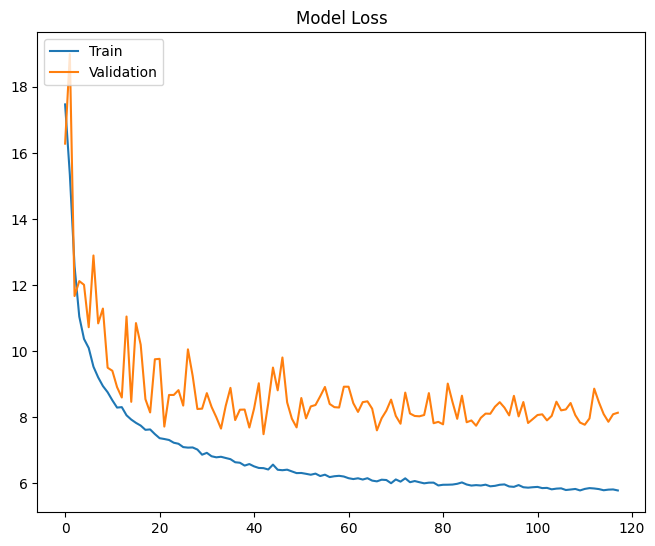

In [199]:
plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=("loss")
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

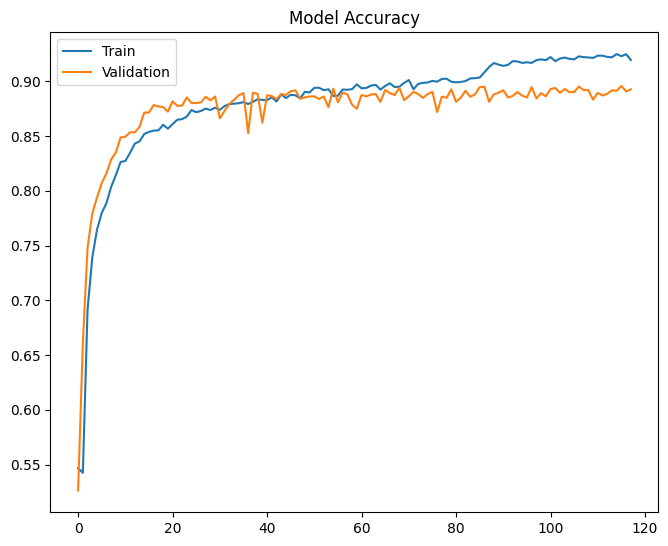

In [200]:
plt.plot(History.history["sex_out_accuracy"])
plt.plot(History.history["val_sex_out_accuracy"])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

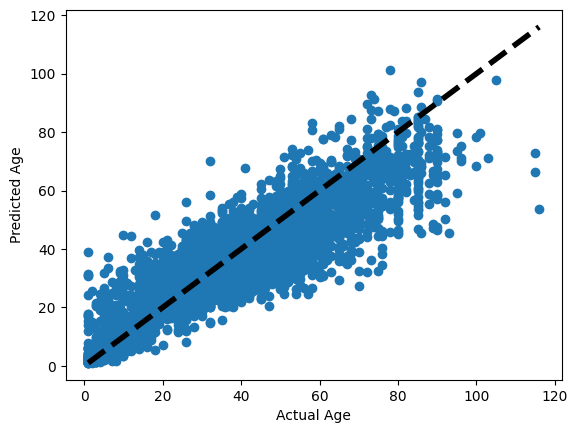

In [205]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel("Actual Age")
ax.set_ylabel("Predicted Age")
plt.show()

## Making report of the model (gender only)

In [206]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\463674450.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [207]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [208]:
report=classification_report(y_test_2[0],pred_1)

In [209]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      3120
           1       0.84      0.94      0.88      2807

    accuracy                           0.88      5927
   macro avg       0.89      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



In [211]:
results=confusion_matrix(y_test_2[0],pred_1)
results

array([[2608,  512],
       [ 177, 2630]], dtype=int64)

<Axes: >

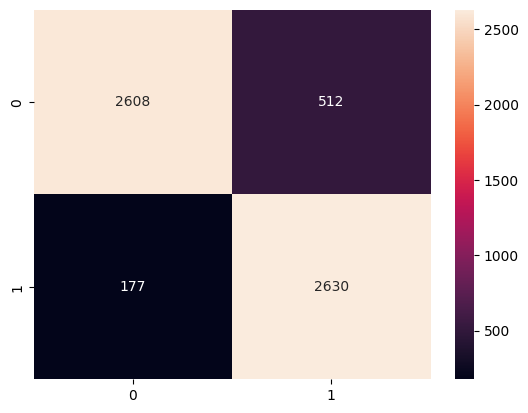

In [213]:
sns.heatmap(results,annot=True,fmt='d')

## testing the images ourself

In [214]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=["Male","Female"]
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted Age is 98
Predicted Gender is Female


C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


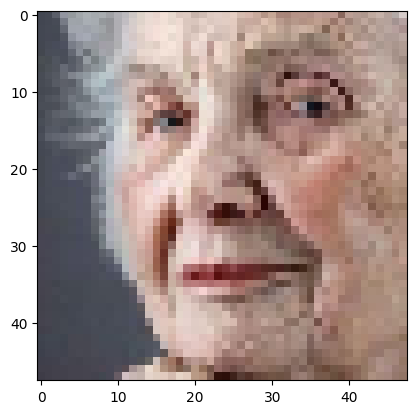

In [215]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
predicted Age is 12
Predicted Gender is Male


C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


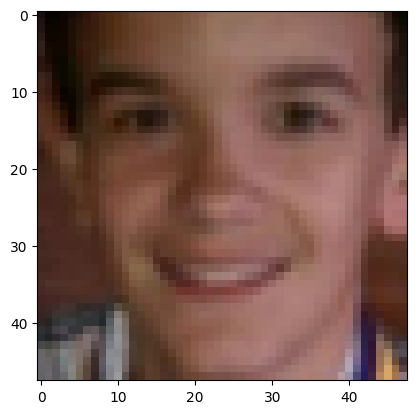

In [216]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
predicted Age is 11
Predicted Gender is Female


C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


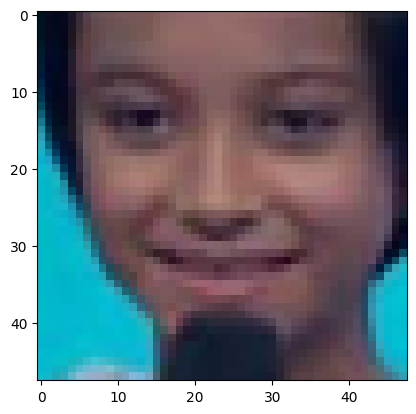

In [217]:
test_image(168,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
predicted Age is 27
Predicted Gender is Male


C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


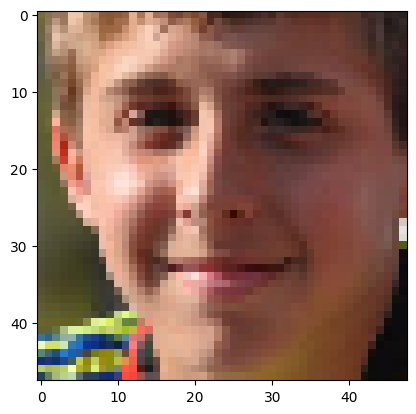

In [218]:
test_image(888,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
predicted Age is 30
Predicted Gender is Female


C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\hudha\AppData\Local\Temp\ipykernel_14384\2833765913.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


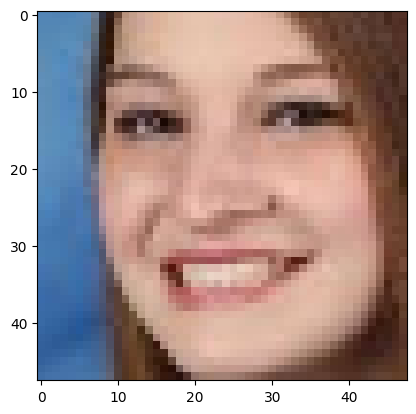

In [219]:
test_image(1288,images_f,images_f_2,Model)